In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
from google.colab import files

In [102]:
upload1=files.upload()

Saving train_revised.csv to train_revised (2).csv


In [103]:
upload2 = files.upload()

Saving test_questions.csv to test_questions (2).csv


In [0]:
import io
df_train= pd.read_csv(io.StringIO(upload1['train_revised.csv'].decode('utf-8')))
df_test= pd.read_csv(io.StringIO(upload2['test_questions.csv'].decode('utf-8')))

In [0]:
df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [0]:
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [184]:
print(df_train.info())
print(df_test.info())
combine = pd.concat([df_train, df_test])
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
ride_id            51645 non-null int64
seat_number        51645 non-null object
payment_method     51645 non-null object
payment_receipt    51645 non-null object
travel_date        51645 non-null object
travel_time        51645 non-null object
travel_from        51645 non-null object
travel_to          51645 non-null object
car_type           51645 non-null object
max_capacity       51645 non-null int64
dtypes: int64(2), object(8)
memory usage: 3.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 7 columns):
ride_id         1111 non-null int64
travel_date     1111 non-null object
travel_time     1111 non-null object
travel_from     1111 non-null object
travel_to       1111 non-null object
car_type        1111 non-null object
max_capacity    1111 non-null int64
dtypes: int64(2), object(5)
memory usage: 60.8+ KB
None
<class 'p

In [185]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# As we can see that "payment_method, payment_receipt and seat_number" are not in the test dataset, we are not going to kep them in training
# dataset too as it may harm our model.
col_must_dropped = ['payment_method', 'payment_receipt', 'seat_number']
df_train = df_train.drop(col_must_dropped, axis=1)

rides = df_train['ride_id'].unique()
rows = []
for ride in rides:
  df_temp = df_train[df_train['ride_id'] == ride].copy()
  df_temp['number_of_tickets'] = len(df_temp)
  rows.append(df_temp[:1])
df_train_updated = pd.concat(rows)

import datetime
df_train_updated['travel_date'] = (pd.to_datetime(df_train_updated['travel_date']))
df_train_updated['travel_date'] = df_train_updated['travel_date'].dt.dayofweek


le = LabelEncoder()
ohe = OneHotEncoder()
df_train_updated['travel_from'] = le.fit_transform(df_train_updated['travel_from'])
# df_train_updated['travel_from'] = ohe.fit_transform(df_train_updated['travel_from'])
df_train_updated['travel_to'] = le.fit_transform(df_train_updated['travel_to'])
# df_train_updated['car_type'] = le.fit_transform(df_train_updated['car_type'])
df_train_updated['car_type'] = pd.get_dummies(df_train_updated['car_type'])
df_train_updated['travel_time'] = df_train_updated['travel_time'].str.split(':').apply(lambda x: int(x[0])*60+ int(x[1]))


df_train_updated.head(7)

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets
0,1442,1,435,9,0,1,49,1
1,5437,6,432,9,0,1,49,1
2,5710,6,425,4,0,1,49,1
3,5777,0,430,1,0,1,49,5
4,5778,0,432,9,0,1,49,31
9,5781,0,429,1,0,1,49,26
12,5784,4,310,7,0,0,11,1


In [186]:
df_train_updated = df_train_updated.drop(['travel_to'], axis= 1)
# Since we can see that max_capacity and car_type are totally reverse of each other, we must drop one of these feature
# also since we did a feature engineering on ride_id to produce number_of_tickets, we must drop ride_id feature too
bad_feats = ['ride_id']
# df_train_updated= df_train_updated.drop(bad_feats, axis = 1)
df_train_updated.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickets
0,1442,1,435,9,1,49,1
1,5437,6,432,9,1,49,1
2,5710,6,425,4,1,49,1
3,5777,0,430,1,1,49,5
4,5778,0,432,9,1,49,31


In [187]:
# Same for test dataset
df_test['travel_date'] = (pd.to_datetime(df_test['travel_date']))
df_test['travel_date'] = df_test['travel_date'].dt.dayofweek

df_test['travel_from'] = le.fit_transform(df_test['travel_from'])
# df_test['travel_from'] = ohe.fit_transform(df_test['travel_from'])
df_test['travel_to'] = le.fit_transform(df_test['travel_to'])
# df_test['car_type'] = le.fit_transform(df_test['car_type'])

df_test['travel_time'] = df_test['travel_time'].str.split(':').apply(lambda x: int(x[0])*60+ int(x[1]))

# df_test = df_test.drop(bad_feats, axis = 1)
df_test = df_test.drop(['travel_to'], axis = 1)
df_test['car_type'] = pd.get_dummies(df_test['car_type'])

df_test.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity
0,247,0,426,5,1,49
1,256,6,668,5,0,11
2,275,4,300,5,0,11
3,285,4,550,5,0,11
4,286,4,560,5,0,11


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor

In [0]:
X = df_train_updated.drop(['number_of_tickets'], axis = 1)
y = df_train_updated['number_of_tickets']

In [0]:
model_rfc = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
model_rfr = RandomForestRegressor(n_estimators = 100, n_jobs = -1, criterion = 'mae')
model_xgb = XGBRegressor()
model_lir = LinearRegression()
model_lor = LogisticRegression()
model_knr = KNeighborsRegressor()
model_dtr = DecisionTreeRegressor()
model_gnb = GaussianNB()

In [191]:
model_rfc.fit(X, y)
model_rfr.fit(X, y)
model_xgb.fit(X, y)
model_lir.fit(X, y)
model_lor.fit(X, y)
model_knr.fit(X, y)
model_dtr.fit(X, y)
model_gnb.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
pred_rfc = model_rfc.predict(X)
pred_rfr = model_rfr.predict(X)
pred_xgb = model_xgb.predict(X)
pred_lir = model_lir.predict(X)
pred_lor = model_lor.predict(X)
pred_knr = model_knr.predict(X)
pred_dtr = model_dtr.predict(X)
pred_gnb = model_gnb.predict(X)

In [193]:
print(mean_absolute_error(pred_rfc, y))
print(mean_absolute_error(pred_rfr, y))
print(mean_absolute_error(pred_xgb, y))
print(mean_absolute_error(pred_lir, y))
print(mean_absolute_error(pred_lor, y))
print(mean_absolute_error(pred_knr, y))
print(mean_absolute_error(pred_dtr, y))
print(mean_absolute_error(pred_gnb, y))

0.0
1.2199887982077133
3.740715566988582
5.992247490026224
6.537526004160665
4.505136821891503
0.0
13.172987678028484


In [0]:
test = df_test

In [0]:
pred_rfc = model_rfc.predict(test)
df_test['number_of_tickets'] = pred_rfc

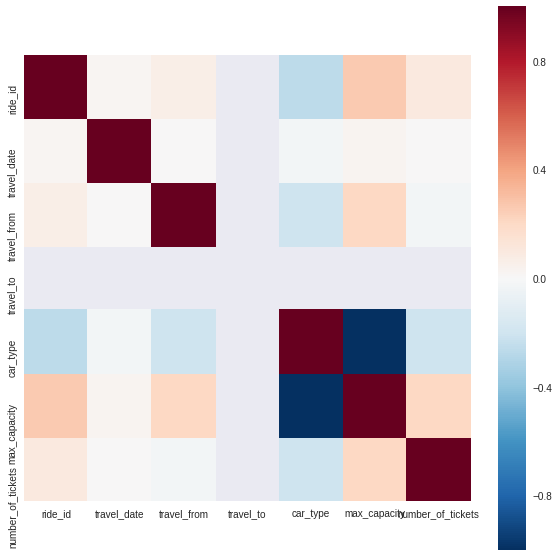

In [0]:
f, ax = plt.subplots(figsize= (10, 10))
corr = df_train_updated.corr()
sns.heatmap(corr, vmax = .8, square = True)
plt.show()

In [0]:
df_train_updated.corr()

,ride_id,travel_date,travel_from,travel_to,car_type,max_capacity,number_of_tickets
ride_id,1.000000,0.016338,0.065618,NaN,-0.257885,0.257885,0.093817
travel_date,0.016338,1.000000,0.007310,NaN,-0.030175,0.030175,0.001035
travel_from,0.065618,0.007310,1.000000,NaN,-0.203815,0.203815,-0.027875
travel_to,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_type,-0.257885,-0.030175,-0.203815,NaN,1.000000,-1.000000,-0.208762
max_capacity,0.257885,0.030175,0.203815,NaN,-1.000000,1.000000,0.208762
number_of_tickets,0.093817,0.001035,-0.027875,NaN,-0.208762,0.208762,1.000000


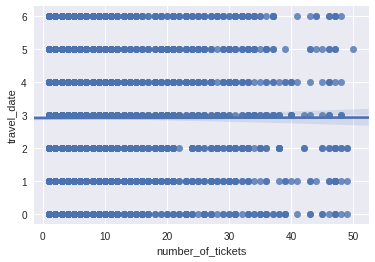

In [0]:
sns.regplot(data = df_train_updated, x='number_of_tickets', y= 'travel_date')

In [0]:
df_train_updated['travel_to'].unique()


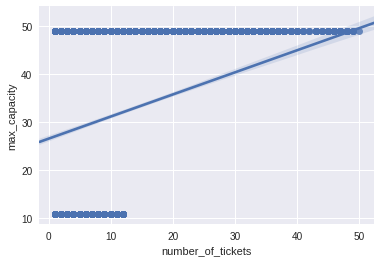

In [0]:
sns.regplot(data = df_train_updated, x= 'number_of_tickets', y = 'max_capacity')

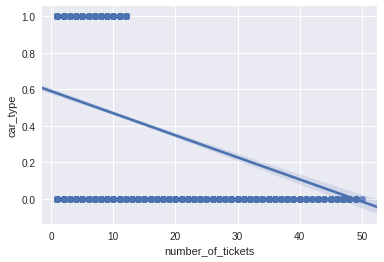

In [0]:
sns.regplot(data = df_train_updated, x= 'number_of_tickets', y = 'car_type')

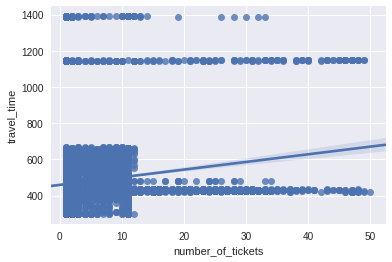

In [0]:
sns.regplot(data = df_train_updated, x= 'number_of_tickets', y = 'travel_time')

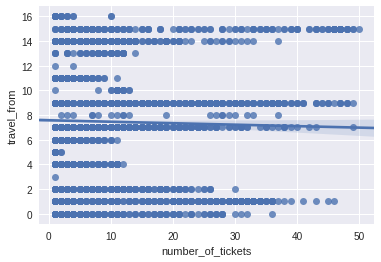

In [0]:
sns.regplot(data = df_train_updated, x= 'number_of_tickets', y = 'travel_from')

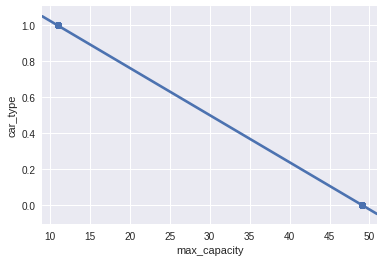

In [0]:
sns.regplot(data = df_train_updated, x= 'max_capacity', y = 'car_type')

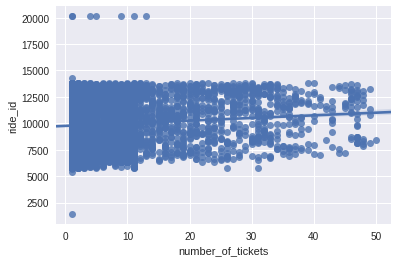

In [16]:
sns.regplot(data = df_train_updated, x = 'number_of_tickets', y = 'ride_id')

In [33]:
# from sklearn.preprocessing import StandardScaler
# df_train = df_train_updated.drop(['number_of_tickets'], axis = 1).copy()
# ss = StandardScaler()
# df_train = ss.fit_transform(df_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import cross_val_score


In [139]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
upload = drive.CreateFile({'title': 'Zindi_10th.csv'})

In [0]:
# df_test['ride_id'] = combine['ride_id'][51645:]

In [0]:
df_test[['ride_id', 'number_of_tickets']].to_csv('Zindi_10th.csv', index= False)
upload.SetContentFile('Zindi_10th.csv')
upload.Upload()